In [1]:
'''
- 분석주제명 
목적 : 판매하는 상품의 타켓 고객에게 광고를 할때 어떤 요일/시간대가 적합한가?

- 분석배경(주제선정 이유)
19년(코로나 이전), 20년(코로나 유행 초기), 21년(코로나 유행 1년 경과)의 온라인쇼핑 데이터를 활용하여 코로나를 전후로 외부활동, 취미활동 등 
야외활동에 대한 제한이 있던 상황과 아닌 상황에서 연령대별 주문 건수와 카테고리별 주문 건수를 분석하고 앞으로 온라인 쇼핑 시장의 미래를 예측해보자.

- 분석목적(분석가설)
1. 평일휴일->다음날이 평일or휴일인 날의 소비 경향
  1) 당일이 평일이고 다음날이 평일or휴일
  2) 당일이 휴일이고 다음날이 평일or휴일
: 다음날이 평일인 경우와 휴일인 경우를 비교하면 후자의 구매건수가 더 많을 것이다.

2. 시간대-> 시간대별 거래건수 분석
: 보통 09~18시까지 업무시간이고 그 후에 개인시간을 보내기 때문에 퇴근한 이후의 시간대에 거래건수가 많을 것이다.

3. TAG->실내/외, 생활/취미용품 … 다양한 그룹으로 나누고 연령별로 나눠서 분석(MZ세대의 소비 성향)
: 20대는 실용적이고 꼭 필요한 제품(생활용품)을 구매하기 보다는 개인의 욕구를 충족시키기 위한 제품(취미용품)을 30,40,50대 보다 많이 구매할 것이다. 
코로나 이후 실외활동에 필요한 제품보다는 실내활동에 필요한 제품의 주문 건수가 늘었을 것이다.

- 데이터건수
21558건

- 데이터 제공 사이트
한국데이터거래소(온라인쇼핑 요일/시간대별 이용 특징)
'''

'\n-\xa0분석주제명\xa0\n목적 : 판매하는 상품의 타켓 고객에게 광고를 할때 어떤 요일/시간대가 적합한가?\n\n-\xa0분석배경(주제선정\xa0이유)\n19년(코로나 이전), 20년(코로나 유행 초기), 21년(코로나 유행 1년 경과)의 온라인쇼핑 데이터를 활용하여 코로나를 전후로 외부활동, 취미활동 등 \n야외활동에 대한 제한이 있던 상황과 아닌 상황에서 연령대별 주문 건수와 카테고리별 주문 건수를 분석하고 앞으로 온라인 쇼핑 시장의 미래를 예측해보자.\n\n-\xa0분석목적(분석가설)\n1. 평일휴일->다음날이 평일or휴일인 날의 소비 경향\n  1) 당일이 평일이고 다음날이 평일or휴일\n  2) 당일이 휴일이고 다음날이 평일or휴일\n: 다음날이 평일인 경우와 휴일인 경우를 비교하면 후자의 구매건수가 더 많을 것이다.\n\n2. 시간대-> 시간대별 거래건수 분석\n: 보통 09~18시까지 업무시간이고 그 후에 개인시간을 보내기 때문에 퇴근한 이후의 시간대에 거래건수가 많을 것이다.\n\n3. TAG->실내/외, 생필품/사치(취미용품) … 다양한 그룹으로 나누고 연령별로\xa0나눠서 분석(MZ세대의 소비 성향)\n: 20대는 실용적이고 꼭 필요한 제품(생필품)을 구매하기 보다는 개인의 욕구를 충족시키기 위한 제품(사치품)을 30,40,50대 보다 많이 구매할 것이다.\xa0\n코로나 이후 실외활동에 필요한 제품보다는 실내활동에 필요한 제품의 주문 건수가 늘었을 것이다.\n\n-\xa0데이터건수\n21558건\n\n-\xa0데이터\xa0제공\xa0사이트\n한국데이터거래소(온라인쇼핑\xa0요일/시간대별\xa0이용\xa0특징)\n'

### 라이브러리 가져오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [3]:
df=pd.read_excel('/Users/supersong/Documents/python/data/onlineshopping_data.xlsx')

### 데이터 탐색하기

In [4]:
df.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101


* 데이터가 년도, 카테고리, 평일휴일, 요일, 시간대, 성별, 연령대 별로 건수의 합계를 보여줌. 집계된 데이터임을 확인

In [5]:
df.shape

(21557, 8)

* 21557개의 행과 8개의 열로 이루어져있음

In [6]:
# 컬럼명을 영어로 변경(한글이 깨질 수도 있기 때문에 컬럼명을 영어로 변경)
df.columns=['YM','CATEGORY','HOLIDAY','DAY','HOUR','SEX','AGE','COUNT_SUM']

In [7]:
# 영어 컬럼명 확인
df.columns

Index(['YM', 'CATEGORY', 'HOLIDAY', 'DAY', 'HOUR', 'SEX', 'AGE', 'COUNT_SUM'], dtype='object')

In [8]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21557 entries, 0 to 21556
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YM         21557 non-null  int64 
 1   CATEGORY   21557 non-null  object
 2   HOLIDAY    21557 non-null  object
 3   DAY        21557 non-null  object
 4   HOUR       21557 non-null  object
 5   SEX        21557 non-null  object
 6   AGE        21557 non-null  object
 7   COUNT_SUM  21557 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


* 데이터 타입이 int과 object로 이루어져있음

In [9]:
# 결측치 확인
df.isnull().sum()

YM           0
CATEGORY     0
HOLIDAY      0
DAY          0
HOUR         0
SEX          0
AGE          0
COUNT_SUM    0
dtype: int64

* 모든 컬럼에 결측치가 존재하지 않음을 확인

In [10]:
# 데이터 타입별 유니크한 value값(샘플) 및 개수 확인
for col in df.select_dtypes('int64').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :' ,df[col].nunique())
    print('유니크값 샘플 :', df[col].unique()[0:3])
    print('------------------------------')

YM
유니크값 개수 : 3
유니크값 샘플 : [201905 202005 202105]
------------------------------
COUNT_SUM
유니크값 개수 : 4135
유니크값 샘플 : [ 291 6225   51]
------------------------------


In [11]:
for col in df.select_dtypes('object').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :' ,df[col].nunique())
    print('유니크값 샘플 :', df[col].unique()[0:15])
    print('------------------------------')

CATEGORY
유니크값 개수 : 14
유니크값 샘플 : ['유아용품' '생활/사무용품' '골프용품' '화장품' '인테리어' '식료품' '서적' '홈쇼핑' '가전' '차량정비_부품'
 '취미용품' '애완용품' '패션' '스포츠의류용품']
------------------------------
HOLIDAY
유니크값 개수 : 2
유니크값 샘플 : ['평일' '휴일']
------------------------------
DAY
유니크값 개수 : 7
유니크값 샘플 : ['목' '월' '일' '토' '화' '수' '금']
------------------------------
HOUR
유니크값 개수 : 6
유니크값 샘플 : ['B.06-10시' 'D.14-18시' 'F.22-02시' 'C.10-14시' 'A.02-06시' 'E.18-22시']
------------------------------
SEX
유니크값 개수 : 2
유니크값 샘플 : ['F' 'M']
------------------------------
AGE
유니크값 개수 : 5
유니크값 샘플 : ['A.2O대' 'C.4O대' 'B.3O대' 'D.5O대' 'E.60대이상']
------------------------------


### 데이터 변환하기

In [12]:
# object 데이터 타입의 데이터 값을 수치형으로 변경
# CATEGORY
CATEGORY=df['CATEGORY']
CATEGORY.unique()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

CATEGORY=CATEGORY.values.reshape((-1,1))
CATEGORYle=le.fit_transform(CATEGORY)

df['CATEGORY_LE']=CATEGORYle.reshape((-1,1))
print(df['CATEGORY_LE'])
print(le.classes_)

0         7
1         2
2         1
3        13
4         8
         ..
21552    11
21553     1
21554     4
21555     8
21556     7
Name: CATEGORY_LE, Length: 21557, dtype: int64
['가전' '골프용품' '생활/사무용품' '서적' '스포츠의류용품' '식료품' '애완용품' '유아용품' '인테리어' '차량정비_부품'
 '취미용품' '패션' '홈쇼핑' '화장품']


* Label Encoding : 범주형 변수의 각 값에 고유한 정수를 부여 

['가전' '골프용품' '생활/사무용품' '서적' '스포츠의류용품' '식료품' '애완용품' '유아용품' '인테리어' '차량정비_부품'
 '취미용품' '패션' '홈쇼핑' '화장품'] 
 
 순서로 0~13으로 지정

In [13]:
# HOUR(0:02-06시/1:06-10시/2:10-14시/3:14-18시/4:18-22시/5:22-02시)
df['HOUR'].loc[df['HOUR']=='A.02-06시']='02-06'
df['HOUR'].loc[df['HOUR']=='B.06-10시']='06-10'
df['HOUR'].loc[df['HOUR']=='C.10-14시']='10-14'
df['HOUR'].loc[df['HOUR']=='D.14-18시']='14-18'
df['HOUR'].loc[df['HOUR']=='E.18-22시']='18-22'
df['HOUR'].loc[df['HOUR']=='F.22-02시']='22-02'

# AGE(20~50:20대~50대/60:60대이상)
df['AGE'].loc[df['AGE']=='A.2O대']=20
df['AGE'].loc[df['AGE']=='B.3O대']=30
df['AGE'].loc[df['AGE']=='C.4O대']=40
df['AGE'].loc[df['AGE']=='D.5O대']=50
df['AGE'].loc[df['AGE']=='E.60대이상']=60
df['AGE']=df['AGE'].astype('int')

* 나머지 object 데이터 타입의 데이터 값을 수치형으로 변경

### 파생변수 생성

In [14]:
# GENERATION 변수 생성 [0:z세대(20)(1997년생~)/1:밀레니얼 세대(30)(1981~1996년생)/2:x세대(40~50)(1965~1980년생)/3:베이비붐세대(60)(1946~1964년생)]

df['GENERATION']=np.nan
df['GENERATION'].loc[df['AGE']==20]=0
df['GENERATION'].loc[df['AGE']==30]=1
df['GENERATION'].loc[(df['AGE']==40)|(df['AGE']==50)]=2
df['GENERATION'].loc[df['AGE']==60]=3

df['GENERATION']=df['GENERATION'].astype('int')

In [15]:
# NECESSITY 변수 생성 [생활용품:(0,2,5,6,7,8,9,12,13)/사치품:(1,3,4,10,11)]
# daily : 가전, 생활/사무용품, 식료품, 애완용품, 유아용품, 인테리어, 차량정비_부품, 홈쇼핑, 화장품
# hobby : 골프용품, 서적, 스포츠의류용품, 취미용품, 패션
daily=[0,2,5,6,7,8,9,12,13]
hobby=[1,3,4,10,11]

df['DAILY']=np.nan
df['DAILY'].loc[df['CATEGORY_LE'].isin(daily)]=0
df['DAILY'].loc[df['CATEGORY_LE'].isin(hobby)]=1

df['DAILY']=df['DAILY'].astype('int')

In [16]:
# INOUT 변수 생성 [샐내:(0,2,3,5,6,7,8,12)/실외:(1,4,9,10,11,13)]
# 실내 : 가전,생활/사무용품,서적,식료품,애완용품,유아용품,인테리어,홈쇼핑
# 실외 : 골프용품,스포츠의류용품,차량정비_부품,취미용품,화장품
INDOOR_LIST=[0,2,3,5,6,7,8,12] 
OUTDOOR_LIST=[1,4,9,10,11,13] 

df['INOUT']=np.nan
df['INOUT'].loc[df['CATEGORY_LE'].isin(INDOOR_LIST)]=0
df['INOUT'].loc[df['CATEGORY_LE'].isin(OUTDOOR_LIST)]=1

df['INOUT']=df['INOUT'].astype(int)

### 이상치 처리

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb80885f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb60d04550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb80885dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb60d04af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb60d04dc0>],
 'means': []}

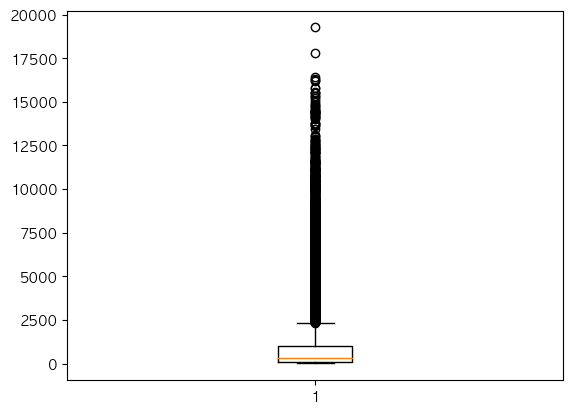

In [17]:
plt.boxplot(df['COUNT_SUM'])

In [18]:
df['COUNT_SUM'].sort_values(ascending=False)

20783    19261
4693     17797
11543    16402
8709     16281
6172     16258
         ...  
14978        3
10693        3
13959        3
8491         3
10976        3
Name: COUNT_SUM, Length: 21557, dtype: int64

* 온라인쇼핑 데이터에서 수치형 데이터인 COUNT컬럼의 값만 확인했지만 집계된 데이터(거래건수합계)라 이상치 처리X.

## 단변량분석

### 1) YM, CATEGORY, HOLIDAY, DAY

<AxesSubplot:xlabel='DAY', ylabel='count'>

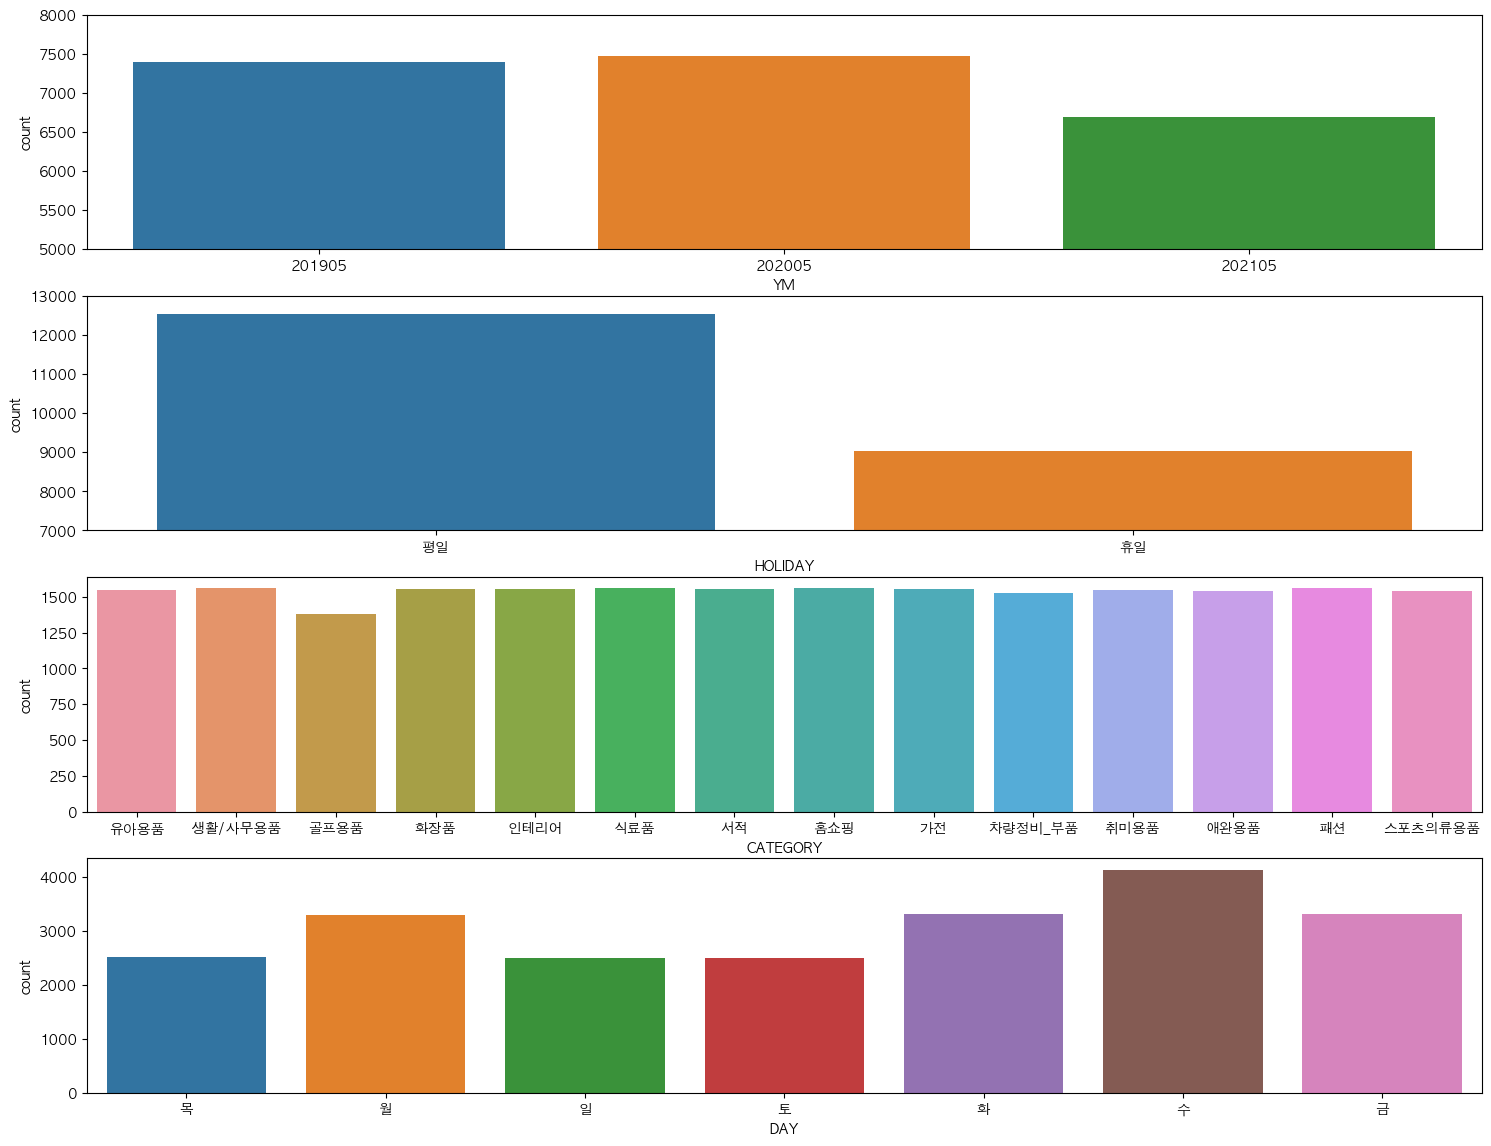

In [19]:
# YM, CATEGORY, HOLIDAY, DAY
plt.figure(figsize=(18,14))

plt.subplot(4,1,1)
sns.countplot(df['YM'])
plt.ylim(5000,8000)

plt.subplot(4,1,2)
sns.countplot(df['HOLIDAY'])
plt.ylim(7000,13000)

plt.subplot(4,1,3)
sns.countplot(df['CATEGORY'])
plt.subplot(4,1,4)

sns.countplot(df['DAY'])

* YM : 세개의 년도를 비교하였을때 비슷한 데이터수가 나올것이라 예상했지만, 21년도의 데이터수가 19,20년도 데이터수보다 작음을 확인.
>- 19년도 5월 공휴일(어린이날:월,근로자의날:수)/20년도 5월 공휴일(어린이날:화,근로자의날:금)/21년도 5월 공휴일(어린이날,부처님오신날:수)
>- 19,20년도 공휴일은 겹치지 않는 요일로 2개의 평일의 데이터에 추가되었고 21년도 5월 공휴일은 겹치는 요일로 1개의 평일의 데이터에 추가됨.
>- 그래서 공휴일이면서 평일 하루의 데이터만큼 2021년도 데이터 수가 차이남.
* CATEGORY : 0~13까지의 카테고리 데이터수를 비교하였을때, 1(골프용품)의 데이터수가 작음을 확인.
>- 골프용품을 구매하지 않는 연령대나 시간대가 존재할 것으로 예상.
* HOLIDAY : 월화수목금(평일), 토일(휴일)로 생각하여 데이터수가 5:2를 예상했지만 공휴일이 휴일에 포함되어 데이터수가 4:3으로 나타남.
>- 평일이면서 공휴일인 경우가 존재할 것으로 예상.
* DAY : 목토일(3,5,6), 월화금(0,1,4), 수(2) 순서로 데이터수가 많음.
>- 19년도 5월 공휴일(어린이날:월,근로자의날:수)/20년도 5월 공휴일(어린이날:화,근로자의날:금)/21년도 5월 공휴일(어린이날,부처님오신날:수)
>- 요일별 추가된 공휴일 : 월(19년도), 화(20년도), 수(19,21년도), 금(20년도)이므로 목토일, 월화금, 수요일 순서로 데이터수가 많음.

### 2) HOUR, SEX, AGE

(3500.0, 4500.0)

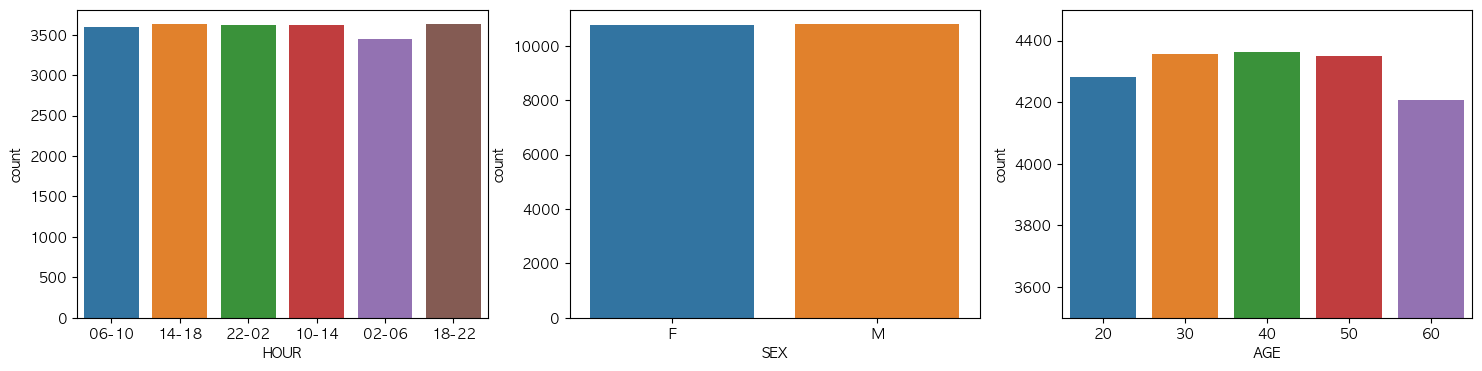

In [20]:
# HOUR, SEX, AGE
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.countplot(df['HOUR'])

plt.subplot(1,3,2)
sns.countplot(df['SEX'])

plt.subplot(1,3,3)
sns.countplot(df['AGE'])
plt.ylim(3500,4500)

* HOUR : 02-06 시간대의 데이터수가 다른 시간대 데이터수보다 적음을 확인.
>- 02-06 시간대에 거래를 하지않은 카테고리나 연령대가 있을 것으로 예상.
* SEX : 남녀의 데이터수가 비슷함을 확인.


* AGE : 40대>30대>50대>20대>60대이상 순으로 나이대별 데이터수가 차이남을 확인.

## 이변량 분석

### 1) AGE/COUNT_SUM

<AxesSubplot:xlabel='AGE', ylabel='COUNT_SUM'>

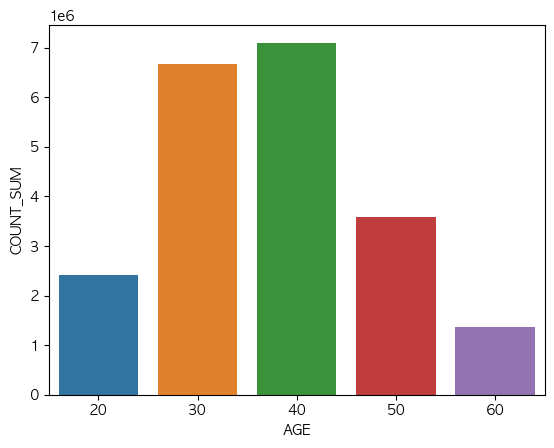

In [21]:
AGE_COUNT_SUM=pd.DataFrame(df['COUNT_SUM'].groupby(df['AGE']).sum())
sns.barplot(x=AGE_COUNT_SUM.index, y='COUNT_SUM', data=AGE_COUNT_SUM)

* 30~40대의 거래건수가 높은 것으로 나타나며, 특히 40대가 가장 많음. 
* 30~40대의 거래건수의 비율이 전체의 65% 이상임.
* 다른 연령에 비해 40대의 거래건수가 2~5배가량 높은 것으로 나타남.

### 2) CATEGORY/COUNT

<AxesSubplot:xlabel='CATEGORY', ylabel='COUNT_SUM'>

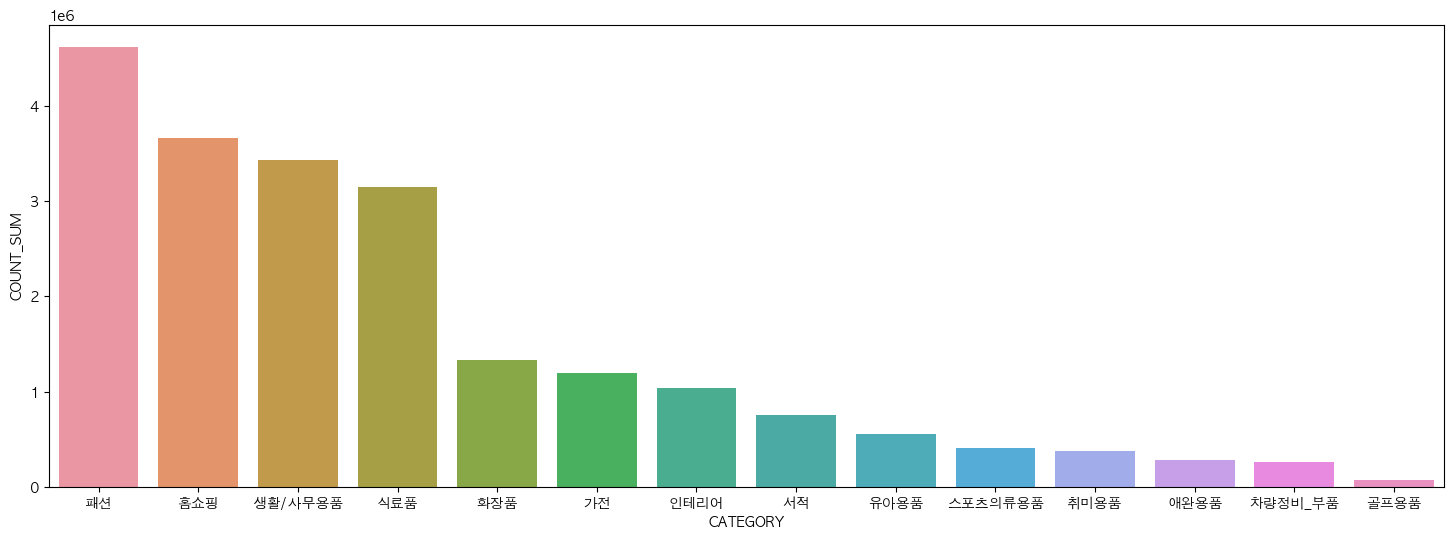

In [22]:
plt.figure(figsize=(18,6))
CAT_COUNT_SUM=pd.DataFrame(df['COUNT_SUM'].groupby(df['CATEGORY']).sum().sort_values(ascending=False))
sns.barplot(x=CAT_COUNT_SUM.index, y='COUNT_SUM', data=CAT_COUNT_SUM)

* 패션,홈쇼핑,생활/사무용품,식료품 순으로 거래건수가 많음.
* 전체에서 4개 카테고리(패션,홈쇼핑,생활/사무용품,식료품)의 거래건수 비율이 70% 이상임.

### 3) HOUR/COUNT

<AxesSubplot:xlabel='HOUR', ylabel='COUNT_SUM'>

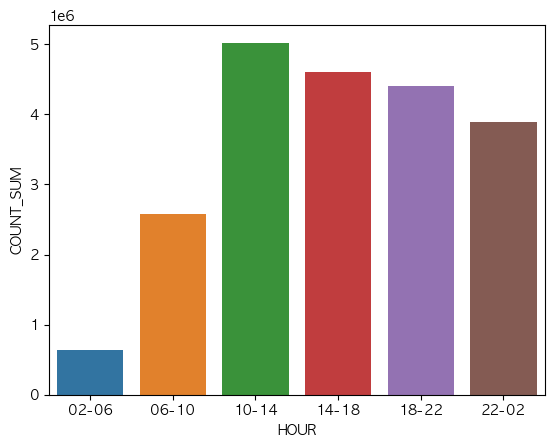

In [23]:
HOUR_COUNT_SUM=pd.DataFrame(df['COUNT_SUM'].groupby(df['HOUR']).sum())
sns.barplot(x=HOUR_COUNT_SUM.index, y='COUNT_SUM', data=HOUR_COUNT_SUM)

* 시간대별 거래건수는 02-06시에서 가장 낮고 10-14시에서 가장 높음.
* 10-14시,14-18시,18-22시에서의 거래건수 비율은 각각 20%를 이상임.

## 다변량 분석

### 1) 카테고리/년도별 건수합계 분석 및 시각화

In [24]:
# 카테고리/년도별 건수합계 분석
CAT_19=df.loc[df['YM']==201905]['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_20=df.loc[df['YM']==202005]['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_21=df.loc[df['YM']==202105]['COUNT_SUM'].groupby(df['CATEGORY']).sum()

diff_1920=CAT_20-CAT_19 #카테고리별 19,20년도 차이
diff_2021=CAT_21-CAT_20 #카테고리별 20,21년도 차이

percent_1920=round((CAT_20-CAT_19)/CAT_19*100,2) #카테고리별 19,20년도 증감률
percent_2021=round((CAT_21-CAT_20)/CAT_20*100,2) #카테고리별 20,21년도 증감률

# 카테고리/년도별 건수합계차이, 증감률 데이터프레임
diff_percent_ym=pd.DataFrame({'cnt_19':CAT_19,
                              'cnt_20':CAT_20,
                              'cnt_21':CAT_21,
                              'diff_1920':diff_1920,
                              'diff_2021':diff_2021,
                              'percent_1920':percent_1920,
                              'percent_2021':percent_2021})
diff_percent_ym

,cnt_19,cnt_20,cnt_21,diff_1920,diff_2021,percent_1920,percent_2021
CATEGORY,,,,,,,
가전,285046,401960,504626,116914,102666,41.02,25.54
골프용품,15096,28243,32380,13147,4137,87.09,14.65
생활/사무용품,759332,1223749,1449176,464417,225427,61.16,18.42
서적,218550,259462,280362,40912,20900,18.72,8.06
스포츠의류용품,97687,151036,162668,53349,11632,54.61,7.70
식료품,642621,1064161,1441522,421540,377361,65.60,35.46
애완용품,62621,98877,119223,36256,20346,57.90,20.58
유아용품,158076,187190,207577,29114,20387,18.42,10.89
인테리어,222600,385761,424541,163161,38780,73.30,10.05


* 모든 카테고리에서 거래건수가 큰 폭으로 상승함.
* 20/21년도 온라인쇼핑 시장이 아직 커지고 있지만, 19/20년도와 비교하면 건수차이가 점차 줄고있고 성장도 더디게 될 것으로 예상.

Text(0.5, 1.0, 'percent_change_20/21')

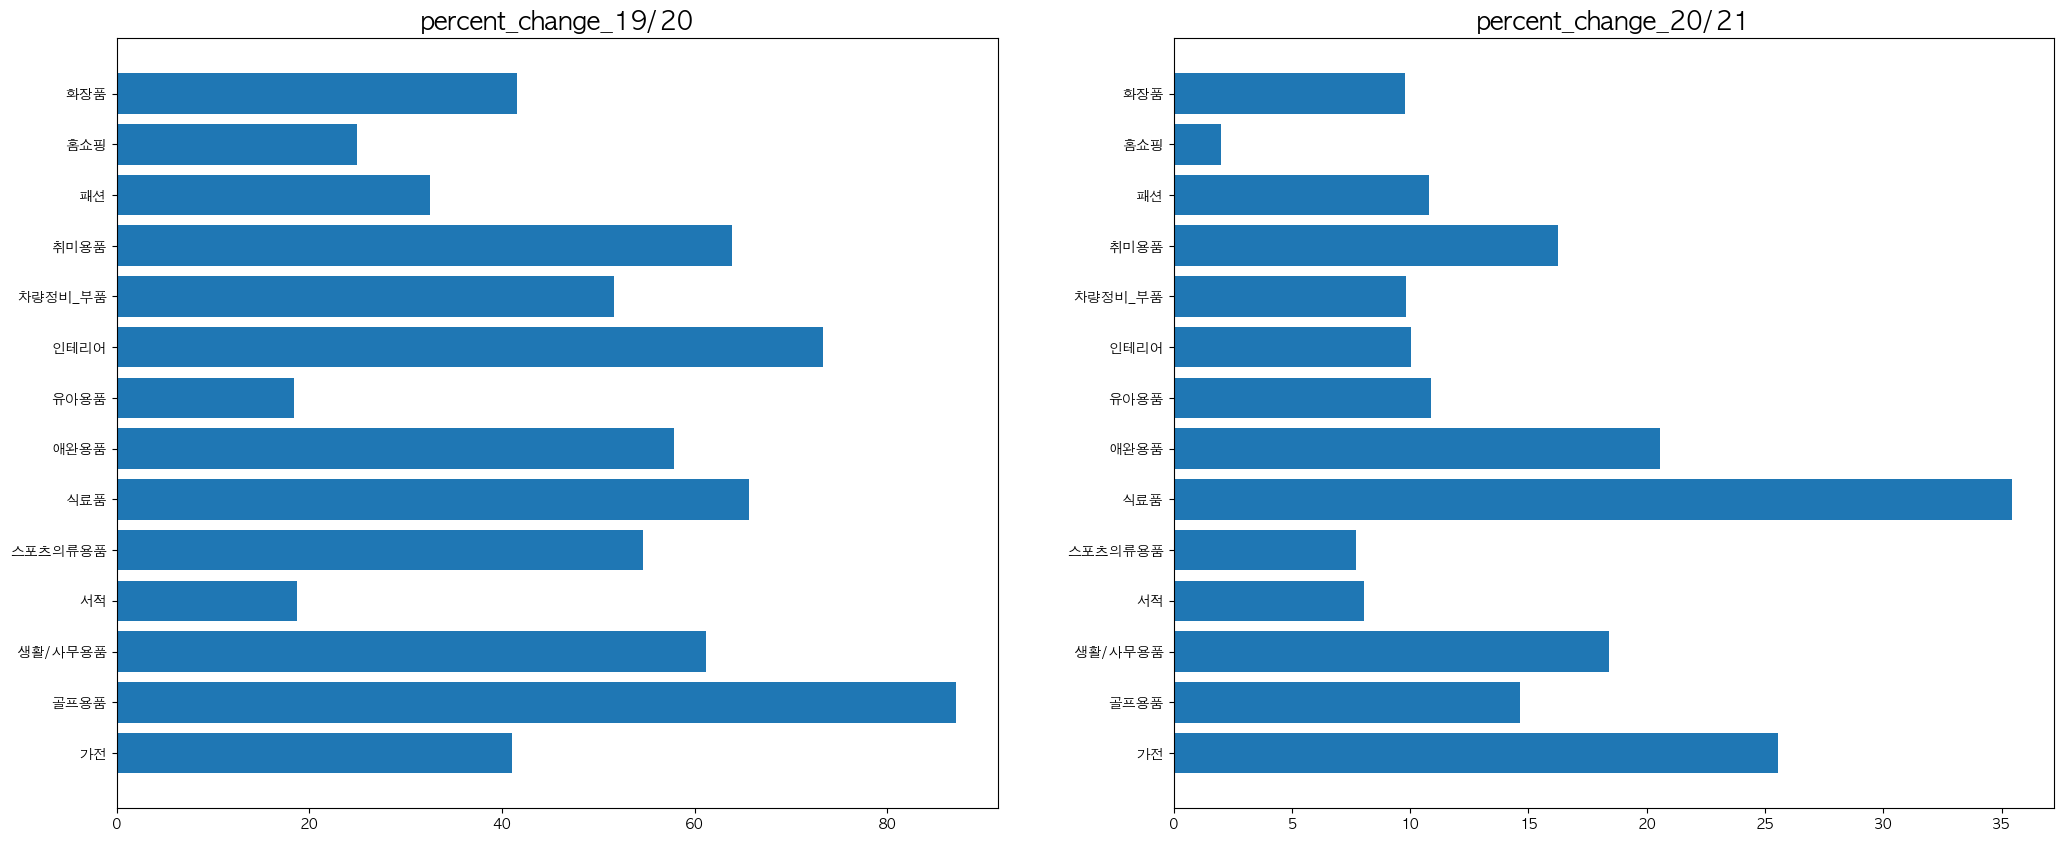

In [25]:
# 카테고리/년도별 건수합계 증감률 시각화
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.barh(diff_percent_ym.index, diff_percent_ym['percent_1920'])
plt.title('percent_change_19/20', fontsize=18)
plt.subplot(1,2,2)
plt.barh(diff_percent_ym.index, diff_percent_ym['percent_2021'])
plt.title('percent_change_20/21', fontsize=18)

* 19/20년에는 골프용품>인테리어>식료품>취미용품 순으로 증감률이 높고, 20/21년에는 식료품>가전>애완용품>생활/사무용품 순으로 증감률이 높음.
* 두 그래프에서 식료품의 증감률은 높은 편으로 나타남.

### 2) 카테고리/시간대별 건수합계 분석 및 시각화

In [26]:
# 시간대/카테고리별 건수합계 분석
CAT_TOT=df['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_A=df.loc[df['HOUR']=='02-06']['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_B=df.loc[df['HOUR']=='06-10']['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_C=df.loc[df['HOUR']=='10-14']['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_D=df.loc[df['HOUR']=='14-18']['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_E=df.loc[df['HOUR']=='18-22']['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_F=df.loc[df['HOUR']=='22-02']['COUNT_SUM'].groupby(df['CATEGORY']).sum()
CAT_A

# 카테고리/시간대별 건수합계 비율 데이터프레임
percent_change_hour=pd.DataFrame({'HOUR_0206':round(CAT_A/CAT_TOT*100,2),
                                  'HOUR_0610':round(CAT_B/CAT_TOT*100,2),
                                  'HOUR_1014':round(CAT_C/CAT_TOT*100,2),
                                  'HOUR_1418':round(CAT_D/CAT_TOT*100,2),
                                  'HOUR_1822':round(CAT_E/CAT_TOT*100,2),
                                  'HOUR_2202':round(CAT_F/CAT_TOT*100,2)})
percent_change_hour

,HOUR_0206,HOUR_0610,HOUR_1014,HOUR_1418,HOUR_1822,HOUR_2202
CATEGORY,,,,,,
가전,2.46,13.55,27.15,22.41,19.25,15.18
골프용품,2.35,11.97,25.26,24.03,20.06,16.32
생활/사무용품,2.85,12.39,25.62,23.44,19.14,16.56
서적,2.39,10.63,26.09,22.76,20.68,17.45
스포츠의류용품,3.43,10.12,24.05,22.40,20.25,19.74
식료품,2.72,11.22,23.70,21.54,22.60,18.23
애완용품,3.51,11.30,23.60,21.40,21.44,18.76
유아용품,3.45,10.75,23.69,20.77,19.77,21.56
인테리어,3.20,10.39,23.70,23.73,20.70,18.29


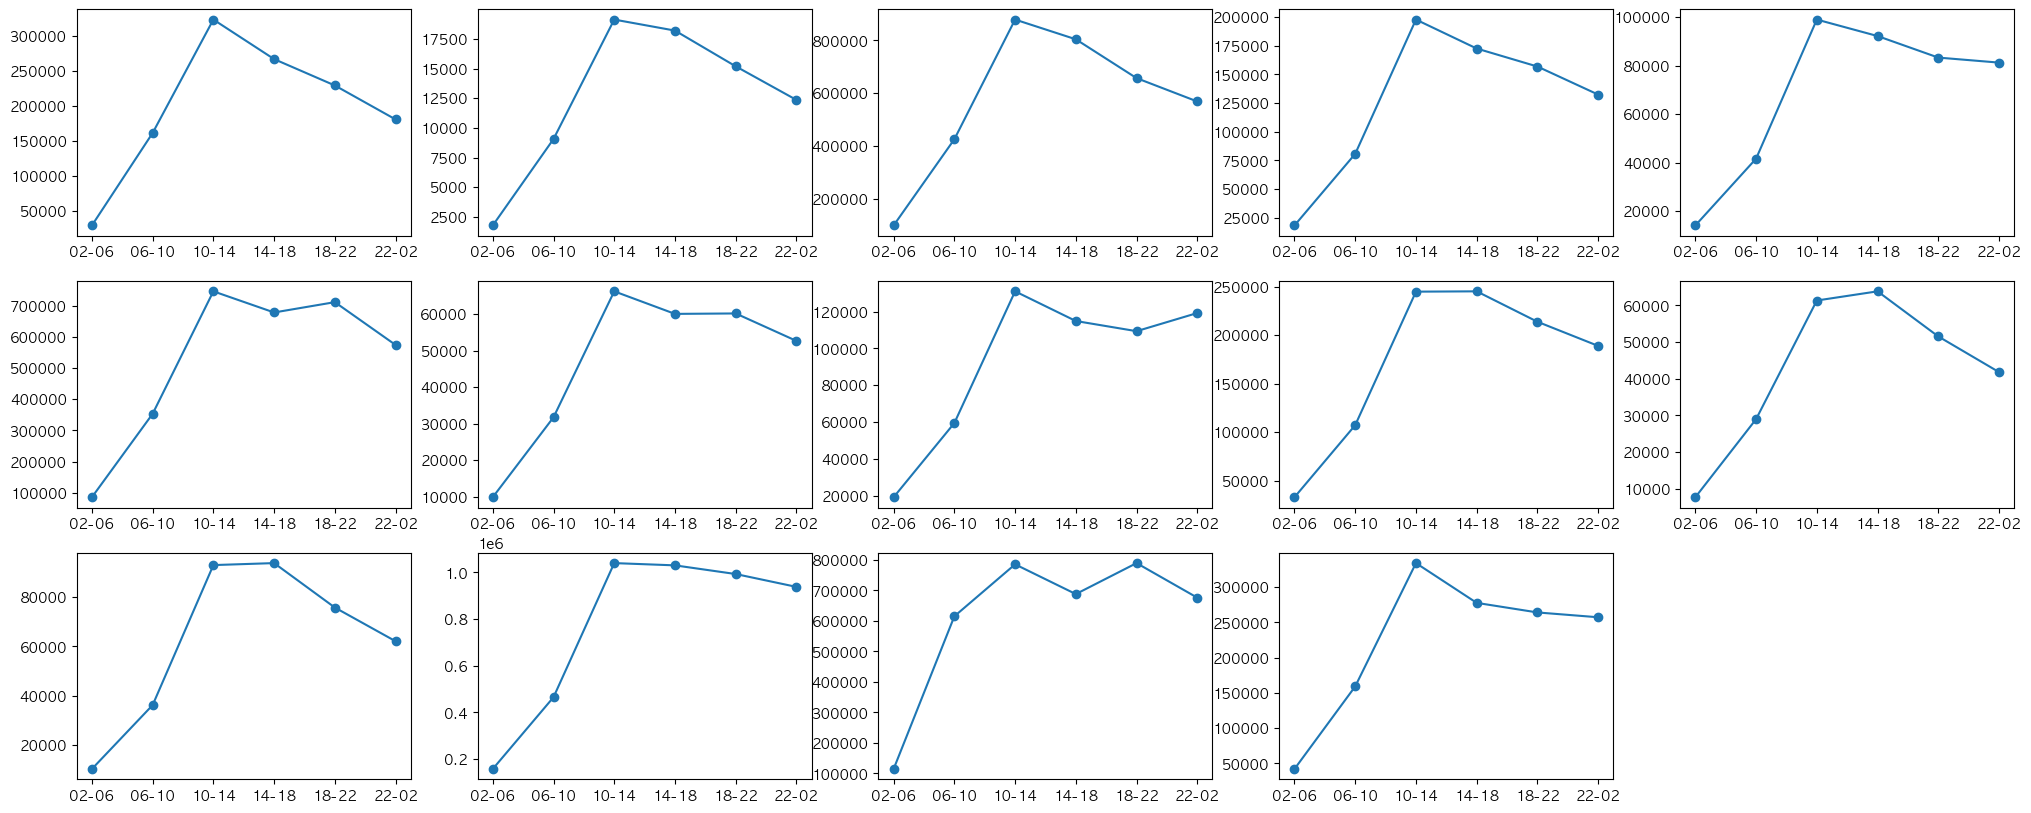

In [27]:
# 시간대/카테고리별 건수합계 시각화
# 시간대(0:02-06시/1:06-10시/2:10-14시/3:14-18시/4:18-22시/5:22-02시)

HOUR=[]
for i in range(len(le.classes_)):
    HOUR.append(pd.DataFrame(df.loc[df['CATEGORY_LE']==i]['COUNT_SUM'].groupby(df['HOUR']).sum()))
    
plt.figure(figsize=(25,10))

for i in range(len(le.classes_)):
    plt.subplot(3,5,i+1)
    plt.plot(HOUR[i].index, HOUR[i]['COUNT_SUM'], marker='o')

* 왼쪽 위에서부터 오른쪽 방향으로 카테고리(0~13) 그래프를 나타냄.
>- 대부분의 그래프에서, 시간대 0(02-06시)에서 가장 낮고 점차 늘어나 2,3(10-14시,14-18시)에서 건수합계가 가장 많아져서 정점을 찍고 낮아지는 경향을 보임.
* 2,3 시간대의 건수합계가 가장 많지 않은 카테고리가 존재함. 
>- 5(식료품),6(애완용품),12(홈쇼핑) : 2,4 시간대의 건수합계가 가장 많음.
>- 7(유아용품) : 2,5 시간대의 건수합계가 가장 많음.
* 2~5까지의 감소 폭이 크지 않은 카테고리가 존재함.
>- 11(패션) : 2~5 시간대의 모든 건수합계 비율이 20%를 이상임.

### 3) 카테고리/성별 건수합계 분석 및 시각화

In [28]:
# 카테고리/성별 건수합계 분석(0:여/1:남)
SEX_F_TOT=df.loc[df['SEX']=='F']['COUNT_SUM'].sum()
SEX_M_TOT=df.loc[df['SEX']=='M']['COUNT_SUM'].sum()

SEX_F=df.loc[df['SEX']=='F']['COUNT_SUM'].groupby(df['CATEGORY']).sum()
SEX_M=df.loc[df['SEX']=='M']['COUNT_SUM'].groupby(df['CATEGORY']).sum()

# 카테고리/성별 건수합계 비율 데이터프레임
cnt_percent_sex=pd.DataFrame({'CNT_F': SEX_F,
                              'CNT_M': SEX_M,
                              'PERCENT_F': round(SEX_F/SEX_F_TOT*100,2),
                              'PERCENT_M': round(SEX_M/SEX_M_TOT*100,2)})
cnt_percent_sex

,CNT_F,CNT_M,PERCENT_F,PERCENT_M
CATEGORY,,,,
가전,502321,689311,3.64,9.42
골프용품,25397,50322,0.18,0.69
생활/사무용품,2095504,1336753,15.17,18.26
서적,481737,276637,3.49,3.78
스포츠의류용품,221496,189895,1.60,2.59
식료품,2055693,1092611,14.88,14.93
애완용품,197775,82946,1.43,1.13
유아용품,383833,169010,2.78,2.31
인테리어,607009,425893,4.39,5.82


* 여성 거래건수는 패션>홈쇼핑>생활/사무용품>식료품 순으로 높음.
* 남성 거래건수는 패션>생활/사무용품>식료퓸>홈쇼핑 순으로 높음.

<BarContainer object of 14 artists>

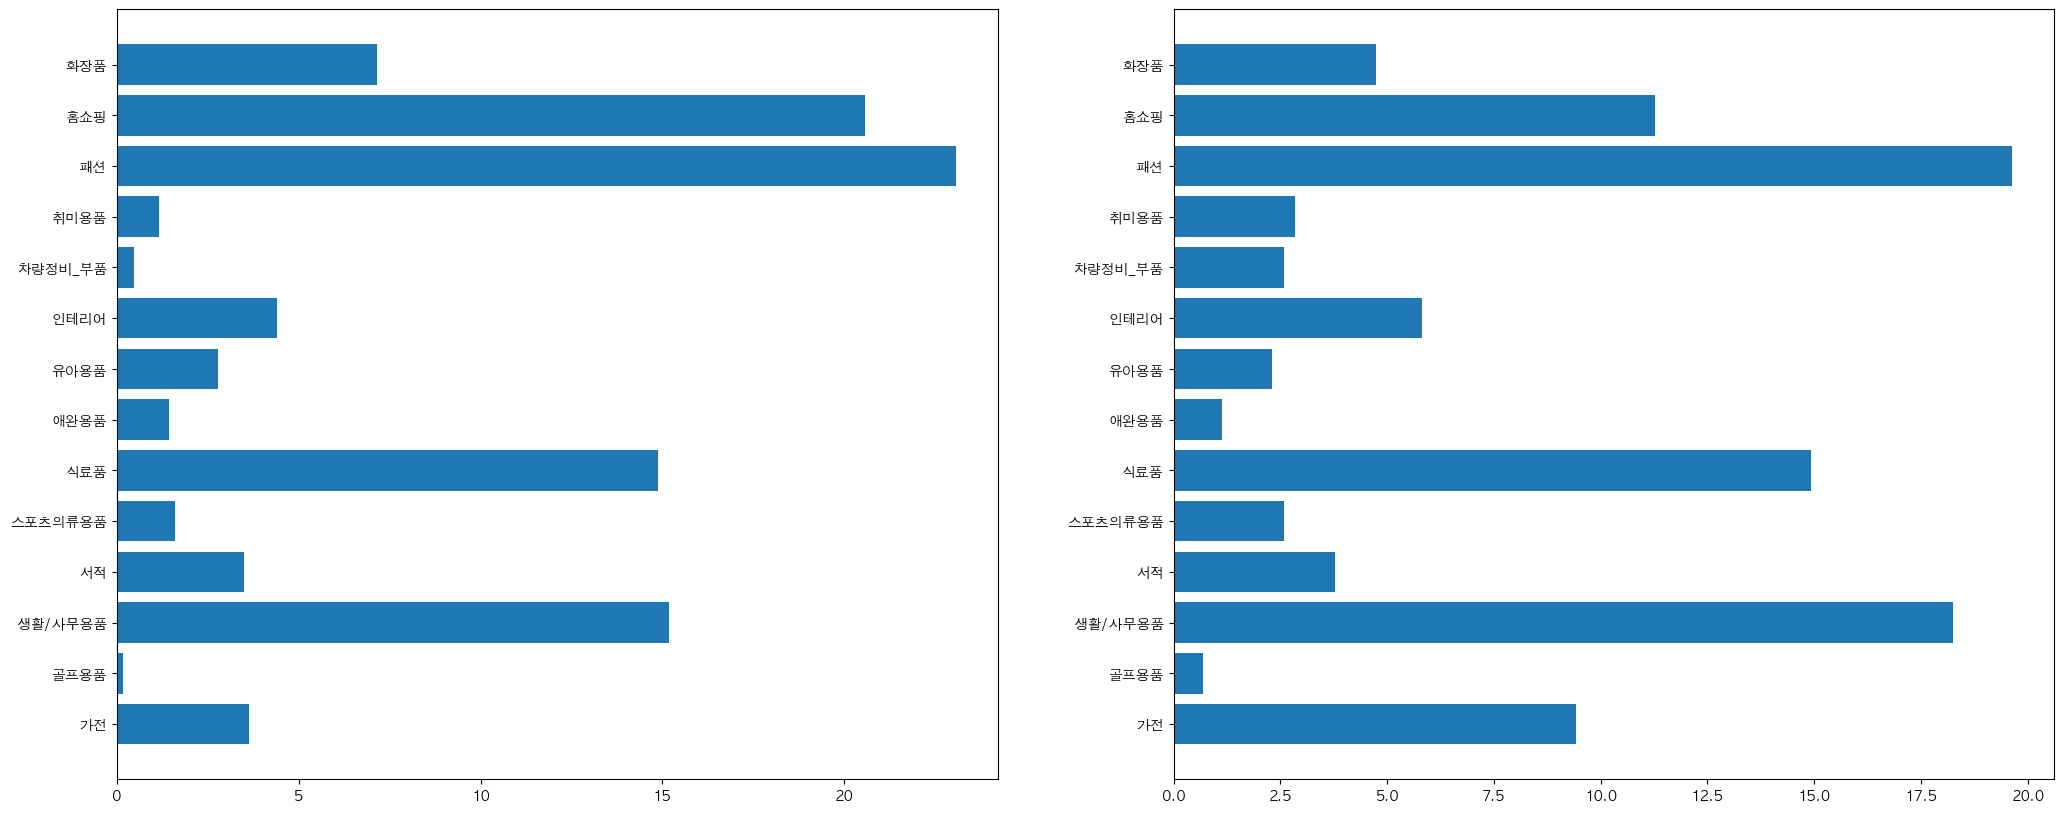

In [29]:
# 카테고리/성별 건수합계 비율 시각화
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.barh(cnt_percent_sex.index, cnt_percent_sex['PERCENT_F'])

plt.subplot(1,2,2)
plt.barh(cnt_percent_sex.index, cnt_percent_sex['PERCENT_M'])

* 카테고리별 남녀 거래건수 비율이 전체적으로 비슷하지만 홈쇼핑, 가전에서 5% 이상 차이가 남.

### 4) 카테고리/연령별 건수합계 분석

In [70]:
# 카테고리/연령별 건수합계 분석
AGE=[]
AGE_TOT=df['COUNT_SUM'].groupby(df['AGE']).sum()
for i in range(len(df['AGE'].unique())):
    AGE.append(df.loc[df['AGE']==(i+2)*10]['COUNT_SUM'].groupby(df['CATEGORY']).sum())

# 카테고리/연령대별 건수합계 비율 데이터프레임
cnt_percent_age=pd.DataFrame({'CNT_20': AGE[0],
                              'CNT_30': AGE[1],
                              'CNT_40': AGE[2],
                              'CNT_50': AGE[3],
                              'CNT_60': AGE[4],
                              'PERCENT_20': round((AGE[0]/AGE_TOT[:1].values*100),2),
                              'PERCENT_30': round((AGE[1]/AGE_TOT[1:2].values*100),2),
                              'PERCENT_40': round((AGE[2]/AGE_TOT[2:3].values*100),2),
                              'PERCENT_50': round((AGE[3]/AGE_TOT[3:4].values*100),2),
                              'PERCENT_60': round((AGE[4]/AGE_TOT[4:5].values*100),2)})
cnt_percent_age

,CNT_20,CNT_30,CNT_40,CNT_50,CNT_60,PERCENT_20,PERCENT_30,PERCENT_40,PERCENT_50,PERCENT_60
CATEGORY,,,,,,,,,,
가전,145555,426519,406781,163361,49416,6.01,6.40,5.73,4.56,3.61
골프용품,2217,14449,34981,20416,3656,0.09,0.22,0.49,0.57,0.27
생활/사무용품,321740,1134519,1189310,564178,222510,13.28,17.03,16.75,15.74,16.26
서적,58971,215062,360779,102609,20953,2.43,3.23,5.08,2.86,1.53
스포츠의류용품,70271,151017,135704,44453,9946,2.90,2.27,1.91,1.24,0.73
식료품,314240,1036624,1103588,518929,174923,12.97,15.56,15.55,14.47,12.78
애완용품,52338,93976,84478,39832,10097,2.16,1.41,1.19,1.11,0.74
유아용품,54124,328752,140979,20564,8424,2.23,4.94,1.99,0.57,0.62
인테리어,140314,343145,339248,160544,49651,5.79,5.15,4.78,4.48,3.63


<BarContainer object of 14 artists>

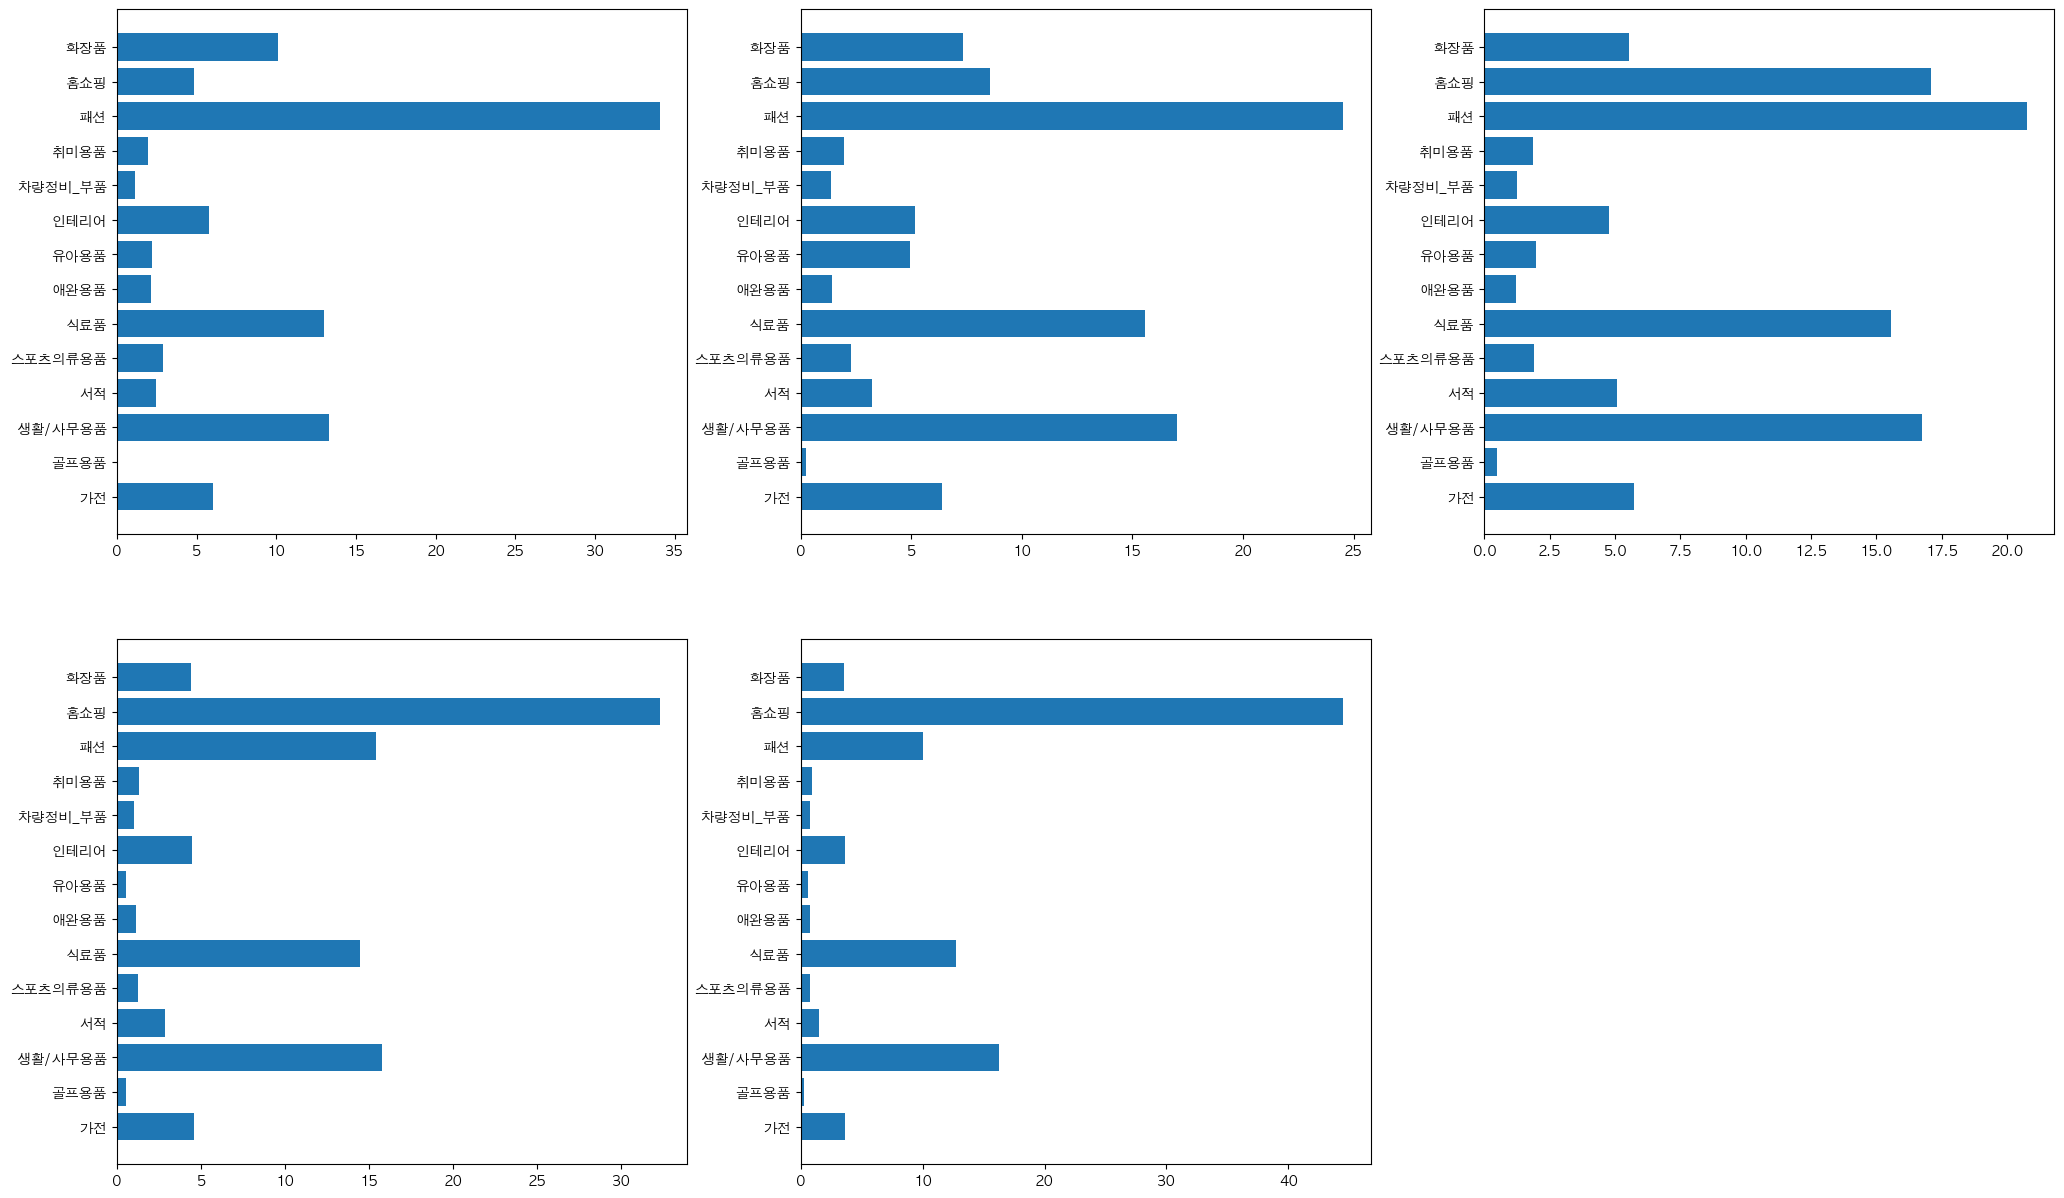

In [31]:
# 카테고리/연령별 건수합계 비율 시각화
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
plt.barh(cnt_percent_age.index, cnt_percent_age['PERCENT_20'])
plt.subplot(2,3,2)
plt.barh(cnt_percent_age.index, cnt_percent_age['PERCENT_30'])
plt.subplot(2,3,3)
plt.barh(cnt_percent_age.index, cnt_percent_age['PERCENT_40'])
plt.subplot(2,3,4)
plt.barh(cnt_percent_age.index, cnt_percent_age['PERCENT_50'])
plt.subplot(2,3,5)
plt.barh(cnt_percent_age.index, cnt_percent_age['PERCENT_60'])

* 왼쪽 위부터 오른쪽으로 20~60대이상 카테고리별 거래건수 비율을 나타냄.
* 20-40대에서 거래건수 비율이 가장 높은 카테고리는 '패션'이고 50-60대이상에서 거래건수 비율이 가장 높은 카테고리는 '홈쇼핑'이다.
* 20-60대이상으로 연령대가 높아질수록 '패션' 비율이 줄어들고 '홈쇼핑' 비율이 높아진다.
* 모든 연령대의 거래건수 비율이 10%가 넘는 카테고리는 생활/사무용품, 식료품, 패션이다.

### 5) 건수합계와 독립변수들의 상관관계

In [32]:
# 각 컬럼의 값이 수치형인 컬럼 추가(상관관계 확인용)
# HOLIDAY_LE
df['HOLIDAY_LE']=np.nan
df['HOLIDAY_LE'].loc[df['HOLIDAY']=='평일']=0
df['HOLIDAY_LE'].loc[df['HOLIDAY']=='휴일']=1

# DAY_LE
df['DAY_LE']=np.nan
df['DAY_LE'].loc[df['DAY']=='월']=0
df['DAY_LE'].loc[df['DAY']=='화']=1
df['DAY_LE'].loc[df['DAY']=='수']=2
df['DAY_LE'].loc[df['DAY']=='목']=3
df['DAY_LE'].loc[df['DAY']=='금']=4
df['DAY_LE'].loc[df['DAY']=='토']=5
df['DAY_LE'].loc[df['DAY']=='일']=6

# HOUR_LE
df['HOUR_LE']=np.nan
df['HOUR_LE'].loc[df['HOUR']=='02-06']=0
df['HOUR_LE'].loc[df['HOUR']=='06-10']=1
df['HOUR_LE'].loc[df['HOUR']=='10-14']=2
df['HOUR_LE'].loc[df['HOUR']=='14-18']=3
df['HOUR_LE'].loc[df['HOUR']=='18-22']=4
df['HOUR_LE'].loc[df['HOUR']=='22-02']=5

# SEX_LE
df['SEX_LE']=np.nan
df['SEX_LE'].loc[df['SEX']=='F']=0
df['SEX_LE'].loc[df['SEX']=='M']=1

<AxesSubplot:>

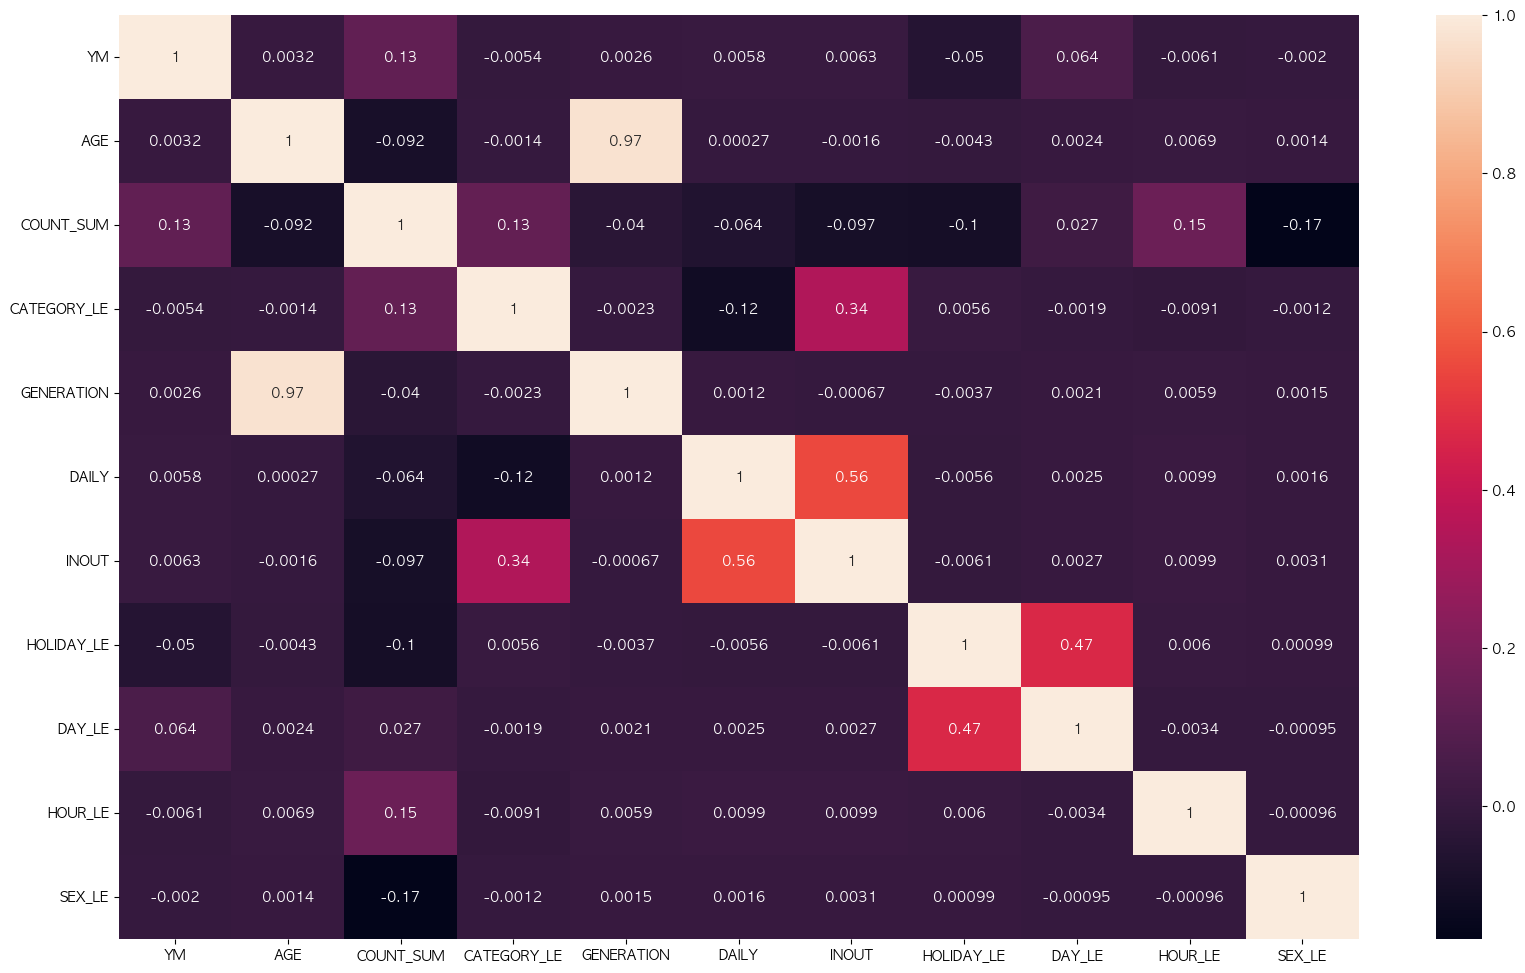

In [33]:
# 히트맵
df_corr=df.iloc[:,:]
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_corr.corr(), annot=True)

In [34]:
# 독립변수들과 COUNT_SUM의 상관관계 비교(두 변수 간의 선형 연관성 강도를 측정)
corr = df_corr.corr(method='pearson')
correlation=corr.unstack()
CNT_SUM_corr=pd.DataFrame(abs(round(correlation['COUNT_SUM'],4)).sort_values(ascending=False),columns=['COUNT_SUM'])
CNT_SUM_corr.head(10)

,COUNT_SUM
COUNT_SUM,1.0000
SEX_LE,0.1682
HOUR_LE,0.1543
CATEGORY_LE,0.1303
YM,0.1276
HOLIDAY_LE,0.1038
INOUT,0.0973
AGE,0.0920
DAILY,0.0645
GENERATION,0.0404


* COUNT_SUM은 SEX>HOUR>CATEGORY>YM>HOLIDAY 순으로 상관관계가 높음.

## 분석가설

### 1) 평일/휴일 경우에 따른 소비 경향
* 년도별로 평일에 공휴일인 날짜가 있고 요일별로 집계가 되어 있어서 평일이면서 휴일인 데이터를 특정할수 없음. 특정할수있는 경우가 제한적임.
* 년도별로 공휴일 요일이 다르기 때문에 다음날이 평일/휴일인 날을 파악.

In [64]:
# 19년도 5월 공휴일(어린이날:월,근로자의날:수)
DAY_19_SUM=pd.DataFrame(df.loc[(df['YM']==201905)].groupby(df['DAY'])['COUNT_SUM'].sum())
# # 20년도 5월 공휴일(어린이날:화,근로자의날:금)
DAY_20_SUM=pd.DataFrame(df.loc[(df['YM']==202005)].groupby(df['DAY'])['COUNT_SUM'].sum())
# # 21년도 5월 공휴일(어린이날,부처님오신날:수)
DAY_21_SUM=pd.DataFrame(df.loc[(df['YM']==202105)].groupby(df['DAY'])['COUNT_SUM'].sum())

* [19년도] 목->금(873561), 금->토(765308), 토->일(509748)
>- 평평 > 평휴 > 휴휴
* [20년도] 수->목(1129092), 토->일(938576)
>- 평평 > 휴휴
* [21년도] 월->화(1577890), 목->금(1216570), 금->토(982690), 토->일(1101122), 일->월(1305148)
>- 평평 > 휴평 > 평평 > 휴휴 > 평휴

* 평일/휴일에 따른 거래건수 차이를 분석하기 전에는 다음날이 휴일인 경우의 거래건수가 많을 것이라 예상했음.
* 19,20,21년도의 특정할 수 있는 모든 경우를 분석한 결과 -> 당일이 평일이면서 다음날이 평일인 경우의 거래건수가 가장 많음.

### * DAY/COUNT_SUM(ANOVA검정)

In [40]:
import scipy.stats as stats
# 수치형 데이터 컬럼
col=['COUNT_SUM']

# 각 그룹의 col 데이터
for i in range(0,len(col)):
    group1 = df[df['DAY_LE']==0][col[i]]
    group2 = df[df['DAY_LE']==1][col[i]]
    group3 = df[df['DAY_LE']==2][col[i]]
    group4 = df[df['DAY_LE']==3][col[i]]
    group5 = df[df['DAY_LE']==4][col[i]]
    group6 = df[df['DAY_LE']==5][col[i]]
    group7 = df[df['DAY_LE']==6][col[i]]
    
    # ANOVA 검정
    f_value, p_val = stats.f_oneway(group1,group2,group3,group4,group5,group6,group7)
    
    # 결과 출력
    print(col[i])
    print("F_value:")
    print(round(f_value,4))
    print("P_value:")
    p_value = '{:.4f}'.format(p_val)
    print(p_value)

COUNT_SUM
F_value:
27.7166
P_value:
0.0000


* p_value값이 0.05보다 낮아 COUNT_SUM과 DAY는 서로 유의미함.

### 2) 생활/취미용품

In [43]:
# 연령별 생활/취미용품 비율 및 차이 데이터프레임
DAILY_TOT=df.loc[df['DAILY']==0]['COUNT_SUM'].sum()
HOBBY_TOT=df.loc[df['DAILY']==1]['COUNT_SUM'].sum()
DAILY_AGE=df.loc[df['DAILY']==0].groupby(df['AGE'])['COUNT_SUM'].sum()
HOBBY_AGE=df.loc[df['DAILY']==1].groupby(df['AGE'])['COUNT_SUM'].sum()
PERCENT_DAILY_AGE=DAILY_AGE/DAILY_TOT # 연령대별 생활용품 비율
PERCENT_HOBBY_AGE=HOBBY_AGE/HOBBY_TOT # 연령대별 취미용품 비율
DIFF_DAILY_HOBBY_AGE=PERCENT_HOBBY_AGE-PERCENT_DAILY_AGE # 취미용품-생활용품 비율 차이

daily_hobby_age=pd.DataFrame({'PERCENT_DAILY_AGE' : round(PERCENT_DAILY_AGE,2),
                              'PERCENT_HOBBY_AGE' : round(PERCENT_HOBBY_AGE,2),
                              'DIFF_DAILY_HOBBY_AGE' : round(DIFF_DAILY_HOBBY_AGE,2)})
daily_hobby_age

,PERCENT_DAILY_AGE,PERCENT_HOBBY_AGE,DIFF_DAILY_HOBBY_AGE
AGE,,,
20,0.10,0.16,0.07
30,0.30,0.34,0.04
40,0.33,0.34,0.01
50,0.19,0.12,-0.07
60,0.08,0.03,-0.05


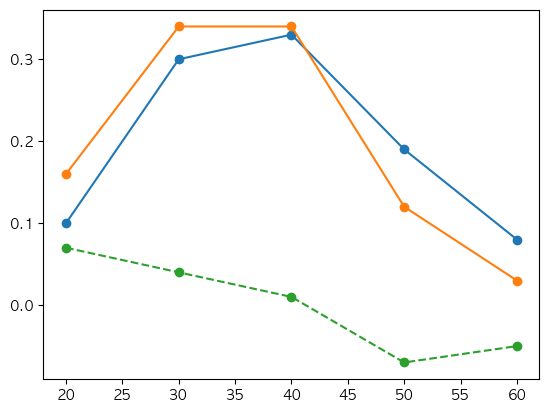

In [37]:
# 연령별 필수/사치품 비율 및 차이 시각화
plt.plot(daily_hobby_age.index,daily_hobby_age['PERCENT_DAILY_AGE'],marker='o') # 연령대별 생필품 비율(파랑)
plt.plot(daily_hobby_age.index,daily_hobby_age['PERCENT_HOBBY_AGE'],marker='o') # 연령대별 사치품 비율(주황)
plt.plot(daily_hobby_age.index,daily_hobby_age['DIFF_DAILY_HOBBY_AGE'],marker='o', ls='--') # 사치품-생필품 비율 차이(초록/점선)

* 20대는 실용적이고 꼭 필요한 제품(생활용품)을 구매하기 보다는 개인의 취미를 위한 제품(취미용품)을 30,40,50대 보다 많이 구매할 것으로 예상.
* 전체 연령에서 생필품보다 취미용품 구매를 더 많이 하는 나이대는 20대이고 20대부터 40대까지 생활용품 구매 비율이 더 높음.
* 40대에 구매 비율이 비슷해지며 50대부터 60대이상까지는 생활용품 구매 비율이 더 높음.

### 3) 실내/실외

In [38]:
# 연도별 실내/실외품 거래건수 증감률 데이터프레임 [실내:(0,2,3,5,6,7,8,12)/실외:(1,4,9,10,11,13)]
TOT_19=df.loc[df['YM']==201905]['COUNT_SUM'].sum()
TOT_20=df.loc[df['YM']==202005]['COUNT_SUM'].sum()
TOT_21=df.loc[df['YM']==202105]['COUNT_SUM'].sum()
INOUT_19=df.loc[df['YM']==201905].groupby(df['INOUT'])['COUNT_SUM'].sum() #19년도 거래건수
INOUT_20=df.loc[df['YM']==202005].groupby(df['INOUT'])['COUNT_SUM'].sum() #20년도 거래건수
INOUT_21=df.loc[df['YM']==202105].groupby(df['INOUT'])['COUNT_SUM'].sum() #21년도 거래건수

PERCENT_INOUT_1920=round((INOUT_20-INOUT_19)/INOUT_19*100,2) #실내/실외 19,20년도 증감률
PERCENT_INOUT_2021=round((INOUT_21-INOUT_20)/INOUT_20*100,2) #실내/실외 20,21년도 증감률

in_out_ym=pd.DataFrame({'INOUT_19' : INOUT_19,
                        'INOUT_20' : INOUT_20,
                        'INOUT_21' : INOUT_21,
                        'PERCENT_INOUT_1920' : round(PERCENT_INOUT_1920,2),
                        'PERCENT_INOUT_2021' : round(PERCENT_INOUT_2021,2)})
in_out_ym

,INOUT_19,INOUT_20,INOUT_21,PERCENT_INOUT_1920,PERCENT_INOUT_2021
INOUT,,,,,
0,3389762,4921149,5753327,45.18,16.91
1,1810674,2496776,2764164,37.89,10.71


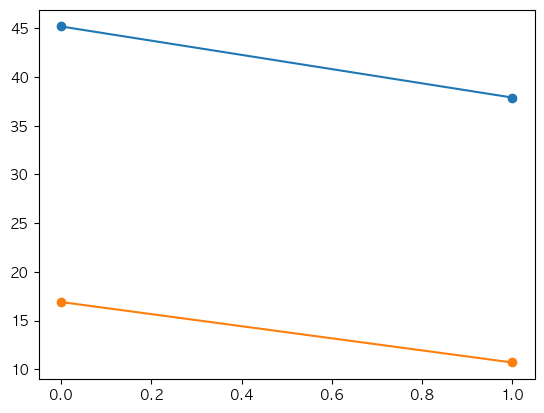

In [39]:
# 연도별 실내/실외품 증감률 시각화
plt.plot(in_out_ym.index,in_out_ym['PERCENT_INOUT_1920'],marker='o')
plt.plot(in_out_ym.index,in_out_ym['PERCENT_INOUT_2021'],marker='o')

* 코로나 이후 실외활동에 필요한 제품보다는 실내활동에 필요한 제품의 주문 건수가 늘었을 것이다.
* 19/20년도, 20/21년도의 증감률을 확인하였을 때, 실외보다 실내의 증감률이 더 높음.

### * CATEGORY/COUNT_SUM(ANOVA 검정)

In [ ]:
import scipy.stats as stats
# 수치형 데이터 컬럼
col=['COUNT_SUM']

# 각 그룹의 col 데이터
for i in range(0,len(col)):
    group1 = df[df['CATEGORY']==0][col[i]]
    group2 = df[df['CATEGORY']==1][col[i]]
    group3 = df[df['CATEGORY']==2][col[i]]
    group4 = df[df['CATEGORY']==3][col[i]]
    group5 = df[df['CATEGORY']==4][col[i]]
    group6 = df[df['CATEGORY']==5][col[i]]
    group7 = df[df['CATEGORY']==6][col[i]]
    group8 = df[df['CATEGORY']==7][col[i]]
    group9 = df[df['CATEGORY']==8][col[i]]
    group10 = df[df['CATEGORY']==9][col[i]]
    group11 = df[df['CATEGORY']==10][col[i]]
    group12 = df[df['CATEGORY']==11][col[i]]
    group13 = df[df['CATEGORY']==12][col[i]]
    group14 = df[df['CATEGORY']==13][col[i]]
    
    # ANOVA 검정
    f_value, p_val = stats.f_oneway(group1,group2)
    
    # 결과 출력
    print(col[i])
    print("F_value:")
    print(round(f_value,4))
    print("P_value:")
    p_value = '{:.4f}'.format(p_val)
    print(p_value)

* p_value값이 0.05보다 낮아 COUNT_SUM과 CATEGORY는 서로 유의미함.

## 분석결과

목적 : 판매하는 상품의 타켓 고객에게 광고를 할때 어떤 요일/시간대가 적합한가?
* 집계 데이터라서 년도마다 공휴일이 다름으로 요일별 데이터 수가 다르기 때문에 카테고리마다 적합한 요일을 분석하는 것에 제한적이었다.


* 전체 카테고리에 적용가능한 인사이트
>- 다음날이 휴일일 경우보다는 평일인 경우에 건수합계가 높은 것으로 확인.
>- 전체 시간대 중에 02-06시의 건수합계가 가장 낮음.
>>- 다음날이 평일인 경우에 광고를 하되 02-06 시간대는 피해야함.

* 카테고리별 적용가능한 인사이트

시간대(1순위 > 2순위)
>- 10-14시 > 14-18시
>>- 가전, 골프용품, 생활/사무용품, 서적, 스포츠의류용품, 패션, 화장품
>- 10-14시 > 18-22시
>>- 식료품, 애완용품
>- 10-14시 > 22-02시
>>- 유아용품
>- 14-18시 > 10-14시
>>- 인테리어, 차량정비_부품, 취미용품
>- 18-22시 > 10-14시
>>- 홈쇼핑
* 패션 : 10-14시 ~ 22-02시 시간대의 모든 건수합계 비율이 20%를 이상임.

성별
* 여성 거래건수는 패션>홈쇼핑>생활/사무용품>식료품 순으로 높음.
* 남성 거래건수는 패션>생활/사무용품>식료퓸>홈쇼핑 순으로 높음.

연령대
* 20-40대에서 거래건수 비율이 가장 높은 카테고리는 '패션'이고 50-60대이상에서 거래건수 비율이 가장 높은 카테고리는 '홈쇼핑'임.
* 모든 연령대의 거래건수 비율이 10%가 넘는 카테고리는 생활/사무용품, 식료품, 패션임.

생활/취미용품
* 전체 연령에서 생필품보다 사치품 구매를 더 많이 하는 나이대는 20대이고 20대부터 40대까지 사치품 구매 비율이 더 높음.
* 40대에 구매 비율이 비슷해지며 50대부터 60대이상까지는 생필품 구매 비율이 더 높음.

실내/실외
* 19/20년도, 20/21년도의 증감률을 확인하였을 때, 실외보다 실내의 증감률이 더 높음.